## Quora_Question_Pair_Similarity

FuzzyWuzzy is a python package that computes a score for approximate question similarity.
we evaluate the usefulness of FuzzyWuzzy for the Quora Question Similarity Problem in this Notebook.

FuzzyWuzzy takes two strings that defines a ratio method and outputs scores from 0 to 100. 100 is a perfect match and 0 is not a total match.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("A:\Datasets_ML\quora pair\\train.csv")
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [3]:
data.shape, data.columns

((404290, 6),
 Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object'))

In [4]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


(                  id           qid1           qid2   is_duplicate
 count  404290.000000  404290.000000  404290.000000  404290.000000
 mean   202144.500000  217243.942418  220955.655337       0.369198
 std    116708.614502  157751.700002  159903.182629       0.482588
 min         0.000000       1.000000       2.000000       0.000000
 25%    101072.250000   74437.500000   74727.000000       0.000000
 50%    202144.500000  192182.000000  197052.000000       0.000000
 75%    303216.750000  346573.500000  354692.500000       1.000000
 max    404289.000000  537932.000000  537933.000000       1.000000,
 None)

In [5]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
def remove_null(n1, n2):
    try:
        return fuzz.ratio(n1, n2)
    except:
        return 0

In [7]:
data['fuzz_score'] = data.apply(lambda x: remove_null(x['question1'], x['question2']), axis=1)
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,fuzz_score
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,93
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,65


In [8]:
data['is_duplicate'].unique()

array([0, 1], dtype=int64)

In [9]:
zero_s = list(data[data['is_duplicate'] == 0]['fuzz_score'])
one_s = list(data[data['is_duplicate'] == 1]['fuzz_score'])

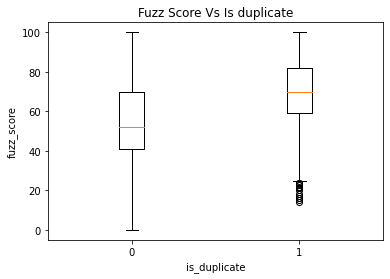

In [10]:
#To check correlation between fuzz score and duplicate status
plt.boxplot([zero_s, one_s])
plt.xlabel('is_duplicate')
plt.ylabel('fuzz_score')
plt.title("Fuzz Score Vs Is duplicate")
plt.xticks([1, 2], [0, 1])
plt.show()

In [11]:
no_duplicate_= data[(data['is_duplicate'] == 0) & (data['fuzz_score']>95)]


In [12]:
p = no_duplicate_.shape[0]

In [13]:
print("The number of non-duplicate question pairs with a high fuzz score is :", p)

The number of non-duplicate question pairs with a high fuzz score is : 3482


In [14]:
no_duplicate_.head(10) #Top 10 rows

,id,qid1,qid2,question1,question2,is_duplicate,fuzz_score
14,14,29,30,What are the laws to change your status from a...,What are the laws to change your status from a...,0,96
41,41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,97
42,42,85,86,"Can I make 50,000 a month by day trading?","Can I make 30,000 a month by day trading?",0,98
89,89,179,180,What is your review of The Next Warrior: Provi...,What is your review of The Next Warrior: Provi...,0,98
145,145,291,292,Does Fab currently offer new employees stock o...,Does Uber currently offer new employees stock ...,0,96
298,298,596,597,On what online platforms can I post ads for be...,What online platforms can I post ads for beer ...,0,96
496,496,990,991,Which are the major highways in California and...,Which are the major highways in California and...,0,96
585,585,1168,1169,Can you play Asian Playstation 4 games on a Eu...,Can you play Asian Playstation 4 games on a Eu...,0,98
712,712,1420,1421,What behavioral adaptations do pandas have?,What behavioral adaptations do red pandas have?,0,96
976,976,1947,1948,What are the main imports and exports of Venez...,What are the main imports and exports of Venez...,0,96


Fuzzywuzzy is a tool that performs simple text-based analysis. It does not have the ability to understand language. The output shows some correlation with the desired label, but it does not capture the purpose of the question, thus it is not sufficient for this Kaggle problem (and perhaps not even useful as a feature).